In [35]:
#imports:
import pandas as pd
import nltk
nltk.download("punkt")
nltk.download('wordnet')
nltk.download('omw-1.4')
STOCK_NEWS_DATASET_FILE = "../data/aapl_us_equities_news.csv"

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\groot\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\groot\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\groot\AppData\Roaming\nltk_data...


In [6]:
df = pd.read_csv(STOCK_NEWS_DATASET_FILE)
df_apple = df[df["ticker"] == 'AAPL']
df_apple

,id,ticker,title,category,content,date,provider,url,open,high,low,close,adj_close,volume
8491,290924,AAPL,Waiting For Direction On The Markets,opinion,This stock market has been a difficult one for...,2012-07-16,Cam Hui,https://www.investing.com/analysis/waiting-for...,21.611429,21.843571,21.607857,21.675358,18.507113,301260400
8546,290925,AAPL,Mid Year Update U S And Canadian Stock Marke...,opinion,From 2004 to 2010 the TSX 300 Index of leading...,2012-07-19,Baskin Financial Blog,https://www.investing.com/analysis/mid-year-up...,21.831429,21.976786,21.642857,21.940001,18.733074,436861600
8591,290928,AAPL,Trade Apple After Earnings,opinion,It may look like a spider web but the mishmas...,2012-07-23,Abigail Doolittle,https://www.investing.com/analysis/trade-apple...,21.228571,21.639286,20.989643,21.565357,18.413191,487975600
8592,290927,AAPL,Apple Earnings Preview Quarterly Dip On Deck,opinion,Last quarter Apple AAPL reported the 2nd bes...,2012-07-23,David Dyer,https://www.investing.com/analysis/apple-earni...,21.228571,21.639286,20.989643,21.565357,18.413191,487975600
8593,290926,AAPL,Summer Heat Scorches Europe And U S,opinion,Europe flares as summer heat continues Summer...,2012-07-23,John Nyaradi,https://www.investing.com/analysis/summer-heat...,21.228571,21.639286,20.989643,21.565357,18.413191,487975600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194022,271476,AAPL,The Zacks Analyst Blog Highlights Merck Broa...,opinion,For Immediate ReleaseChicago IL January 28 ...,2020-01-28,Zacks Investment Research,https://www.investing.com/analysis/the-zacks-a...,78.150002,79.599998,78.047501,79.422501,77.937515,162234000
194023,271475,AAPL,What To Expect From Tech Week Earnings,opinion,The apex of earnings season is upon us with th...,2020-01-28,Zacks Investment Research,https://www.investing.com/analysis/what-to-exp...,78.150002,79.599998,78.047501,79.422501,77.937515,162234000
194067,271065,AAPL,Europe Stocks U S Futures Pare Gains Bonds ...,news,Bloomberg European stocks pared early gai...,2020-01-28,Bloomberg,https://www.investing.com/news/stock-market-ne...,78.150002,79.599998,78.047501,79.422501,77.937515,162234000
194110,270710,AAPL,Tech And Communications Services Sectors How ...,opinion,While thanks to Bespoke much of the Street a...,2020-01-28,Brian Gilmartin,https://www.investing.com/analysis/tech-and-co...,78.150002,79.599998,78.047501,79.422501,77.937515,162234000


In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

tokens = df_apple['content'].apply(word_tokenize)

In [9]:
token_list_FACKDEZE = []
for token_list in tokens:
    token_list_FACKDEZE.extend(token_list)

In [36]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')
tokens_no_stopwords =  [token.lower() for token in token_list_FACKDEZE if not token.lower() in stop_words]
filtered_moby = [token for token in tokens_no_stopwords if token.isalpha()]
final_list = [lemmatizer.lemmatize(token) for token in filtered_moby]
from collections import Counter
counted_moby = Counter(final_list)

In [37]:
counted_moby.most_common(50)

[('year', 75063),
 ('company', 67825),
 ('stock', 58308),
 ('apple', 51046),
 ('market', 48599),
 ('zacks', 43165),
 ('nasdaq', 42962),
 ('earnings', 39931),
 ('quarter', 36217),
 ('billion', 32476),
 ('u', 32146),
 ('share', 31706),
 ('growth', 27295),
 ('also', 26980),
 ('new', 26737),
 ('said', 25141),
 ('million', 24777),
 ('nyse', 24445),
 ('inc', 23556),
 ('price', 23508),
 ('estimate', 23275),
 ('revenue', 22669),
 ('last', 21792),
 ('expected', 21633),
 ('investor', 20564),
 ('aapl', 20019),
 ('report', 19495),
 ('rank', 19144),
 ('day', 18648),
 ('could', 18420),
 ('buy', 18150),
 ('time', 17878),
 ('sale', 17731),
 ('one', 17186),
 ('month', 17109),
 ('may', 17053),
 ('p', 16930),
 ('week', 16259),
 ('per', 15704),
 ('iphone', 15558),
 ('see', 15300),
 ('technology', 15018),
 ('rate', 15011),
 ('high', 14818),
 ('industry', 14616),
 ('service', 14611),
 ('percent', 14583),
 ('china', 13946),
 ('index', 13895),
 ('like', 13807)]

<h1>Clustering</h1>

In [209]:
#This is a simpler example:
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
extra_words = ['friday','higher', 'lower', 'last', '10', 'results', 'beat', 'ago','adjusted', 'positive', 'economic', 'prices', 'reuters','2017', '2018', '2019' ,'session','average','closed','new','revenue','estimates','data','close','esp','rank', 'pe','surprise','rate','markets','consensus', 'points','price','one', 'estimate','short','trading','term','time', 'today','t2108','high','report', 'like','may','level', 'shares', 'sales', 'reveneu','expected','revenues', 'week', 'trade','point', 'nyse','dollar','zacks','500', 'day', 'would','fell','fed',"market", 'said', "stock", "earnings", "index", "apple", "nasdaq", "company", "million", "billion", "stocks", "buy",'quarter', 'investors','next', "year","years", "point", "per", "percent", "also", "growth"]
stop_words.extend(extra_words)
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\groot\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [210]:
documents = df_apple["content"]
vectorizer = TfidfVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(documents)
true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(max_iter=100, n_clusters=5, n_init=1)

In [211]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import numpy as np
Truncate = TruncatedSVD(2)
my_array = Truncate.fit_transform(X)
labels = model.labels_
df = pd.DataFrame(my_array, columns = ['x', 'y'])
df['labels'] = labels

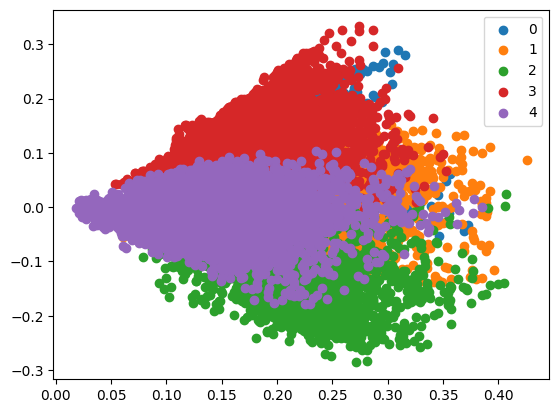

In [212]:
#plotting the results
u_labels = np.unique(labels)

for i in u_labels:
    
    plt.scatter(df[df['labels']==i]['x'], df[df['labels']==i]['y'], label=i)
plt.legend()
plt.show()

In [213]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i,)
    for ind in order_centroids[i, :10]:
        print('%s' % terms[ind],)
    print()

Top terms per cluster:
Cluster 0:
fund
etf
ratio
value
etfs
top
compares
score
funds
choice

Cluster 1:
investment
companies
chart
tech
long
us
even
still
research
aapl

Cluster 2:
dow
futures
oil
rose
china
us
composite
crude
tuesday
wednesday

Cluster 3:
cents
share
inc
past
strong
reported
industry
could
2020
fiscal

Cluster 4:
iphone
china
google
inc
amazon
samsung
music
qualcomm
users
app



C:\NLPgit\NLP_Group14\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
